## Observations and Insights 

# talk about what I see in the data

In [ ]:
#the the Notebook what to do.
#%matplotlib notebook


In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# check the columns for duplicates then comment out
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset-day 2 pd multiline/unemployment
combine_data = pd.merge(mouse_metadata, study_results)
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.

# this is telling me that I have 249 mice
print(len(combine_data["Mouse ID"].unique()))

total_mice_df = combine_data.loc[:,["Mouse ID"]]
#.drop_duplicates()
number_of_mice = len(total_mice_df)
len(total_mice_df)

249


1893

In [16]:
# *Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.*
# this is the most poorly written question!

duplicates = combine_data[combine_data.duplicated(['Mouse ID', 'Timepoint'],False)]
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combine_data.loc[combine_data["Mouse ID"]=="g989"]
g989

# now we see the timepoint/mouseID duplicates- 0.5,10,20 in Timepoint column
#25 30 and 35 didn't have a duplicate. That is why they are not in frame above output 1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# we are cleaning the data and specically g989. we will use this "clean_data_df" going forward.
# create a new df and print
clean_data_df = combine_data.loc[combine_data["Mouse ID"]!="g989"]
print(clean_data_df)
        

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# Checking the number of mice in the clean DataFrame.(Reference-MPG day 2)
cleaned_mid = combine_data.loc[combine_data["Mouse ID"]!="g989"]["Mouse ID"].unique()
len(cleaned_mid)


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

#clean_data_df 


summary_df = clean_data_df.groupby(['Drug Regimen'])
#summary_df.head()

Tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
Tumor_mean

Tumor_median = summary_df['Tumor Volume (mm3)'].median()
Tumor_median

Tumor_var = summary_df['Tumor Volume (mm3)'].var()

Tumor_std = summary_df['Tumor Volume (mm3)'].std()

Tumor_SEM = summary_df['Tumor Volume (mm3)'].sem()

Summary_stats = pd.DataFrame({'Mean Tumor Volume':Tumor_mean,
                             'Median Tumor Volume':Tumor_median,
                              'Tumor Volume Variance':Tumor_var,
                              'Tumor Volume Std Dev':Tumor_std,
                             'Tumor Volume Std Err':Tumor_SEM})
                              
Summary_stats
        

#use clean_data_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

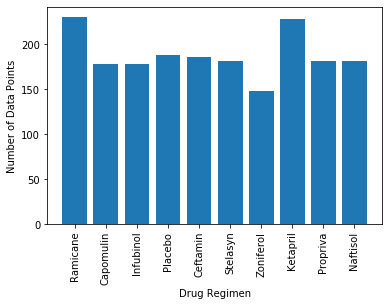

In [8]:
# Generate a bar plot showing the number of mice per time point for
#each treatment throughout the course of the study using pandas. 
#get the unique values in "drug Regimen" column- we have 10 names total

#summary_df.

mouse = clean_data_df.groupby("Drug Regimen")["Mouse ID"].count()
Drugs = clean_data_df['Drug Regimen'].unique()


plt.bar(Drugs, mouse)


plt.xticks(Drugs,rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()                           

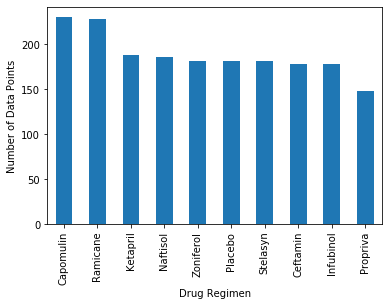

In [9]:
# Generate a bar plot showing the number of mice per time point
#for each treatment throughout the course of the study using pyplot.
# this is pandas

mouse = clean_data_df["Drug Regimen"].value_counts()
#Drugs = clean_data_df['Drug Regimen'].unique()

#This is the part for Pnadas Object"Mouse"
mouse.plot(kind = "bar")


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()     





## Pie Plots

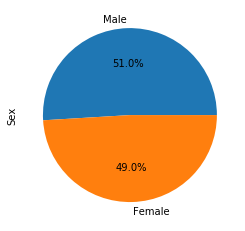

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#counting how many females and males
gender = clean_data_df['Sex'].value_counts()
#gender
# using panda for pie chart
gender.plot(kind = "pie",autopct='%1.1f%%')



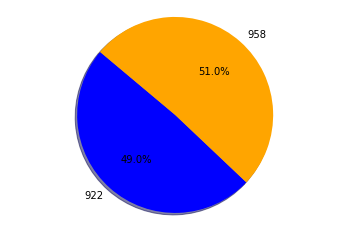

In [11]:
#Generate a pie plot showing the distribution of female versus male mice usuing pyplot.
#clean_data_df

mg = clean_data_df.groupby("Sex")
cmg = mg["Sex"].count()

cmg = mg["Sex"].count()
colors = ["Blue","Orange"]
explode = (0.1,0)


plt.pie(cmg, labels=cmg, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
                 
#clean_data_df   

# 1)Start by getting the last (greatest) timepoint for each mouse

#mice = clean_data_df.groupby("Mouse ID",)[("Drug Regimen","Timepoint")].max()
#mice
# 2) Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#merged_col = pd.merge(clean_data_df, mice,how='outer', on="Drug Regimen")
#merged_col

#mouse_combine.describe()
#merged_df = clean_data_df.merge(mice, on = 'Mouse ID')
#merged_df = merged_df[merged_df['Mouse ID'] != ['Drug Regimen']
FTV = pd.merge(clean_data_df.drop_duplicates(subset=["Mouse ID"] keep="last)
md = FTV.groupby('Drug Regimen')
md 
                                             
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of: {lowerq}")
print(f"The upper quartile of : {upperq}")
print(f"The interquartile range of : {iqr}")
print(f"The the median of : {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")                                             
                                             
                                             
                                             

SyntaxError: invalid syntax (<ipython-input-20-a22dcf6048ce>, line 17)

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
